Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import zscore
%matplotlib inline

In [2]:
# Importing the data file and showing the first Five Record
banking_df =  pd.read_csv("bank.csv")
banking_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
banking_df.shape

(45211, 17)

This file contains 45211 records and 17 columns where Target is our dependent column and rest are independent column. Now Lets analyse what this data is all about

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. In the data we have the following columns

### Client Personal Information

Age ->  Age of the client

Job ->Type of Job (Admin, Blue-collar, Entrepreneur,Housemaid,Management,Retired,Self-Employed, Services ,Student, Technician,Unemployed,Unknown)

Marital -> Marital Status of Client (Single , Married , Divorced)

Education-> Education Status of Client (Primary, Secondary ,Tertiary)

### Client Financial Information

Default -> Whether Client has been defaulted in loan with Yes or No

Balance -> Balance in bank account of the client

Housing -> Whether the client has taken housing Loan with Yes or No

Loan -> Whether the client has taken Personal Loan with Yes or No

### Related to Current Marketing Campaign

Contact -> Client communication Type with Cellular , Telephone or Unknown

Day-> Date of the Month When Cliet was last contacted for Term deposit

Month -> Month in which Person was last contacted for Term Deposit

Duration -> Duration of the call when person was last contacted for Term Deposit(In Seconds)

Campaign - > How Many times client has been contacted in this campaign

### Related to Prior Marketing Campaign

Pdays -> No. of days that passed by after the client was last contacted from the previous campaign

Previous -> How many times that client was contacted before this campaign.

Poutcome -> Outcome of Previous marketing Campaign(Success, failure, Unknown, Other)

### Output Feature  

Target-> Outcome of this Campaign (Yes or No)

In [4]:
banking_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

Here we can see there is no null value in the dataset.

In [5]:
banking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


This shows Number of record in each column with data type of Each Column

In [6]:
banking_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Here Mean and Median value of Age is almost similar so we can say the data in age column is somehow normally distributed but in case of Balance There is huge difference between mean and Median value also standard deviation value is very high So in this case data is Rightly skewed Again . We can not get much information from describe function because most of our data is categorical type.Here Minimum value of Pdays is -1 . Here -1 means Person was not contacted in the Previous Campaign.

In [7]:
campaign_result = banking_df["Target"].value_counts()
campaign_result

no     39922
yes     5289
Name: Target, dtype: int64

Number of People who accepted Term deposit is 5289 and the No. of people who did not accepted the term deposit are 39922. Below is the graphical representation of the above data

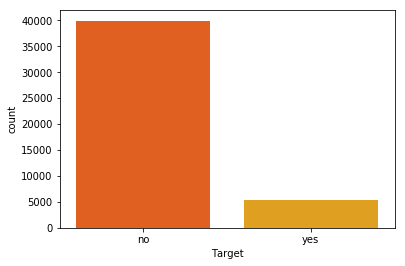

In [8]:
sns.countplot(x= banking_df["Target"],palette="autumn")

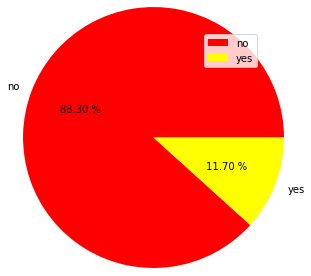

In [9]:
plt.pie(x=campaign_result.values,labels=campaign_result.keys(),radius=1.5,autopct="%.2f %%",colors=["red","yellow"])
plt.legend()
plt.show()

In [10]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

The Above Code is for disabling the scrolling when plots displayed in one cell

In [11]:
# preparing order for data to display
month_order = ["may","jul","aug","jun","nov","apr","feb","jan","oct","sep","mar","dec"]
job_order = ["blue-collar","management","technician","admin.","services","retired","self-employed","entrepreneur","unemployed","housemaid","student","unknown"]
education_order = ["secondary","tertiary","primary","unknown"]
contact_order = ["cellular","unknown","telephone"]
marital_order = ["married","single","divorced"]
loan_order = ["no","yes"]
default_order = ["no","yes"]
housing_order = ["yes","no"]
poutcome_order = ["unknown","failure","other","success"]
order_columns = [month_order,education_order,contact_order,marital_order,loan_order,default_order,housing_order,poutcome_order] 
columns =["month","education","contact","marital","loan","default","housing","poutcome"]

In [12]:
def calculate_percentage_for_target_column(column_name):
    bar =  column_name.patches
    half =  int(len(bar)/2)
    left_bars = bar[:half]
    right_bars =  bar[half:]
    for left,right in zip(left_bars,right_bars):
        left_height =  left.get_height()
        right_height =  right.get_height()
        total_height = left_height + right_height
        column_name.text(x = left.get_x() + (left.get_width())/2 , y =  (left_height+40),s ='{0:.0%}'.format(left_height/total_height), ha="center")
        column_name.text(x = right.get_x() + (right.get_width())/2 , y = right_height + 40,s ='{0:.0%}'.format(right_height/total_height), ha="center")

def calculate_percentage(column_name):
    total = banking_df.shape[0]
    for x in column_name.patches:
        column_name.annotate('{:.1f}%'.format(100*x.get_height()/total), (x.get_x()+0.1, x.get_height()+5))        

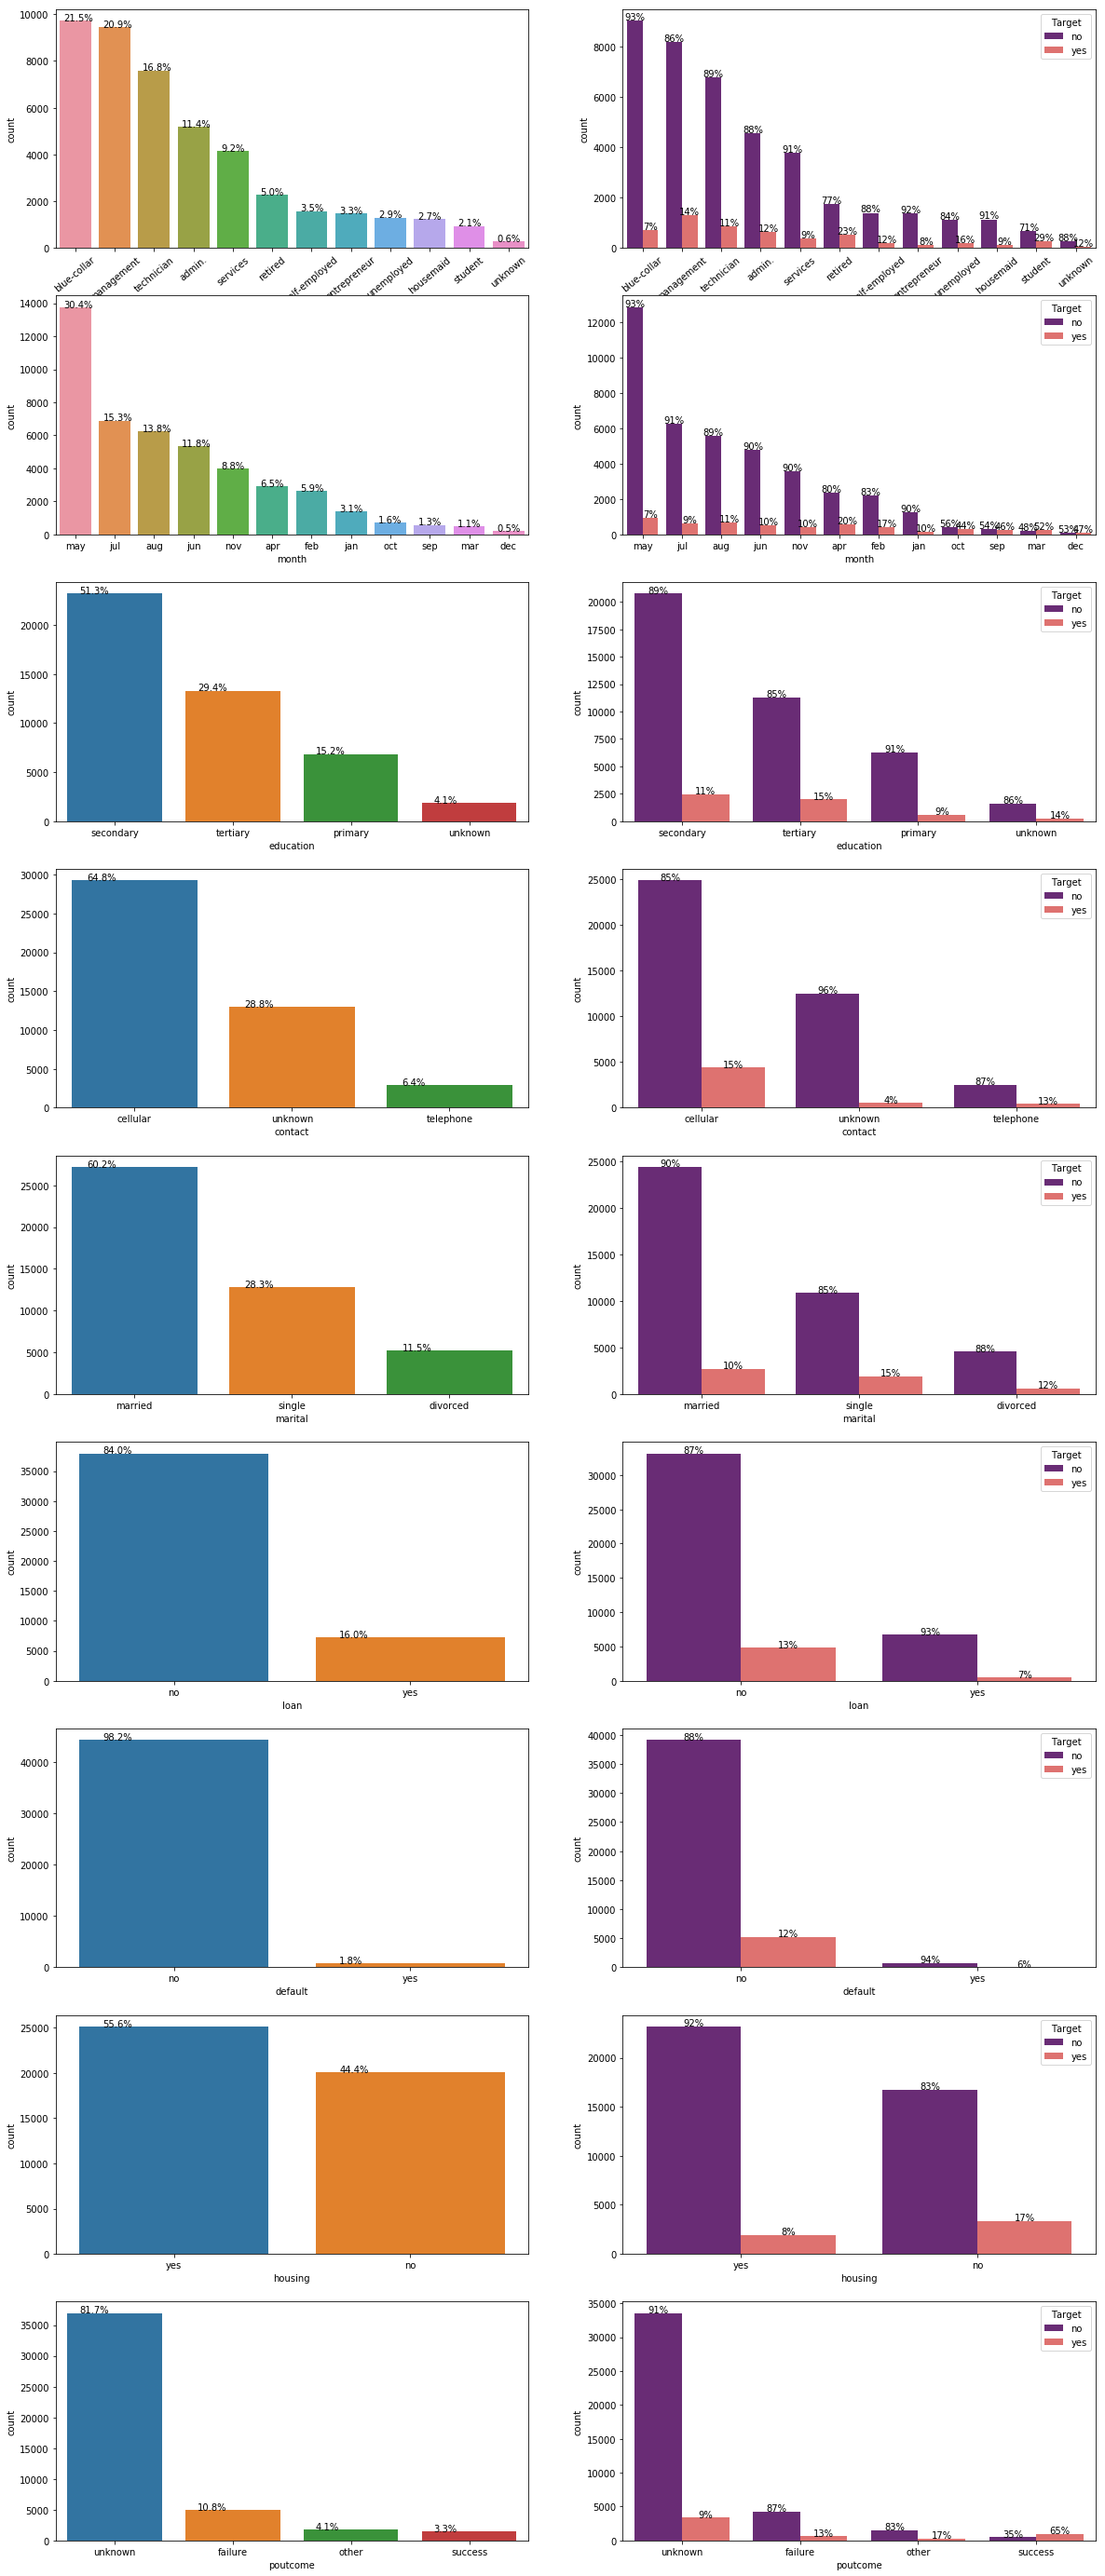

In [13]:
fig , ax =  plt.subplots(nrows=9,ncols=2,figsize = (20,50))
x =  sns.countplot(x=banking_df["job"],ax = ax[0][0],order=job_order)
x.set_xticklabels(x.get_xticklabels(),rotation =40)
calculate_percentage(x)
x =  sns.countplot(x=banking_df["job"],hue=banking_df["Target"],ax = ax[0][1],order=job_order,palette="magma")
x.set_xticklabels(x.get_xticklabels(),rotation =40)
calculate_percentage_for_target_column(x)

for i in np.arange(1,9):
    for j in np.arange(1):
        q =sns.countplot(x=banking_df[columns[i-1]],ax=ax[i][j],order=order_columns[i-1])
        calculate_percentage(q)
        q =sns.countplot(x=banking_df[columns[i-1]],ax=ax[i][j+1],hue=banking_df["Target"],palette="magma",order=order_columns[i-1])
        calculate_percentage_for_target_column(q)

plt.show()

From the Job Graph we have Maximum No. of clients with Blue-collar Job followed by Management Job but clients who subscribed for Bank Term deposit are maximum (in numbers) from Management Job followed by Technician Job.From the Month Graph maximum Numbers of Calls were made in the month of May followed by july and also the maximum (in numbers)Bank term deposit subscribed in the month of May.In Education Graph, we have maximum clients who are secondary educated and maximum clients(in numbers) who subscribed the Term deposit are also secondary educated.In Contact graph , Maximum No. of Clients have Cellular followed by Telephone and the maximum clients who subscribed for Term deposit aslo use cellular as mode of contact.Marital Status of the maximum no. of the clients is Married and the maximum number of clients who subscribed for term deposit are also married.In Personal Laon, only 16% clients have taken personal loan and 84% of the clients have not taken personal loan and the clients who have not taken personal loan more subscribe to Term deposit than the clients who have taken personl loan.In Default graph only 1.8% of the total clients are default and the maximum clients who are not default are subscribed to term deposit. For Housing Loan graph there are 55.6% of the total clients who have taken Housing loan and 44.6% of the clients have not taken housing loan also there are more subscribers of term deposit of those who have not taken the housing loan. In case of Poutcome graph , we can see here outcome of the previous campaign was 81.7% was unknown ,10.8% was Failure ,4.1% was other and only 3.3% was success and in this campaign maximum clients (in numbers) , whose status was unknown in the previous campaign,have subscribed term deposit in this campaign

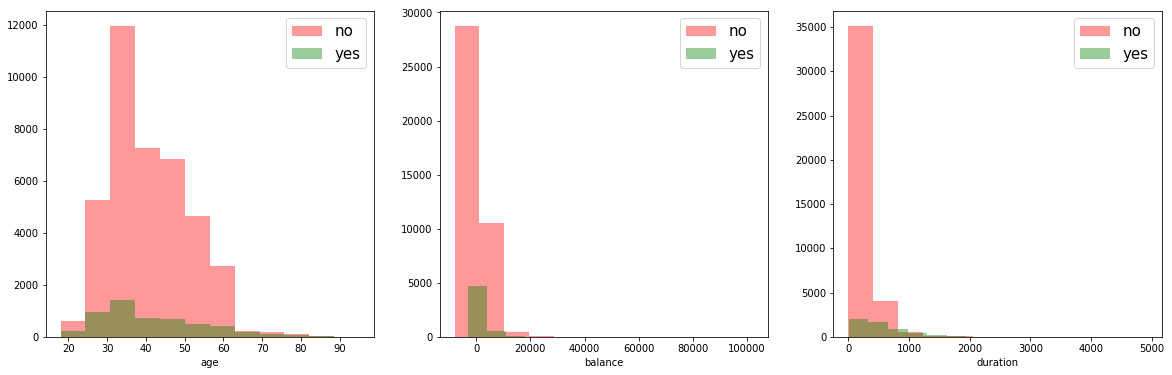

In [14]:
columns = ["age","balance","duration"]
colors =["red","green"]
labels=["no","yes"]
fig , ax =  plt.subplots(nrows=1,ncols=3,figsize = (20,6),squeeze=False)
for i in np.arange(3):
        for color,label in zip(colors,labels):
            z =sns.distplot(a=banking_df[banking_df["Target"]==label][columns[i]],color=color,label=label,ax=ax[0][i],kde=False,bins=12)
            z.legend(fontsize = 15)

From Age graph we can say we have maximum clients are in the age group of between 30 and 50 and the maximum clients who subscribed for term deposit are in the age group of between 30 and 35. In Balance Graph , we have given balance from negative 8019 to positive 102127(from describe function) and the customers who have subscibed term deposit also have balance in negative , 0 and in positive value so we can not say balance have much effect on the clients to decide whether to go for term deposit or not because there are some clients who have negative balance in accounts also have subscribed to term deposit. 

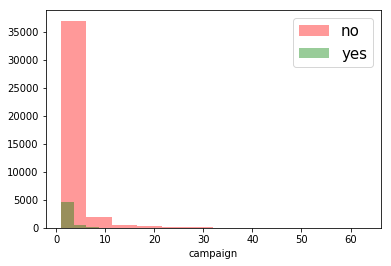

In [15]:
colors =["red","green"]
labels=["no","yes"]
for color,label in zip(colors,labels):
    z=sns.distplot(a=banking_df[banking_df["Target"]==label]["campaign"],color=color,label=label,kde=False,bins=12)
    z.legend(fontsize = 15)

In [16]:
print(banking_df[banking_df["Target"] == "yes"]["campaign"].value_counts().head(6))
# Below are the details of number of clients who subscribe the term deposit on contacted them from one to 6 times

1    2561
2    1401
3     618
4     317
5     139
6      92
Name: campaign, dtype: int64


In Campaign Column it is showing there are 2561 clients who subscribed for Term Deposit was contacted only one time followed by 1401 clients to whom contacts were made 2 times followed by 618 clients to whom contacts were made 3 times and so on. so we can say that there is no such effect on how many times the contact should made to a particular client for making them to subscribe the term deposit 

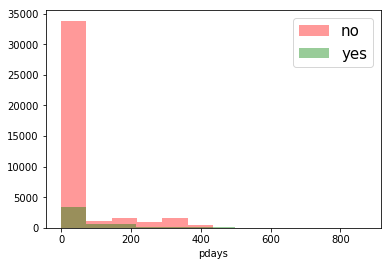

In [17]:
colors =["red","green"]
labels=["no","yes"]
for color,label in zip(colors,labels):
    z=sns.distplot(a=banking_df[banking_df["Target"]==label]["pdays"],color=color,label=label,kde=False,bins=12)
    z.legend(fontsize = 15)

In [18]:
print(banking_df[banking_df["Target"] == "yes"]["pdays"].value_counts().head(6))
# Below are the details of number of clients who subscribe the term deposit and the No. of days passed after the previous campaign

-1      3384
 92       96
 182      80
 91       75
 181      74
 183      64
Name: pdays, dtype: int64


Here -1 means that the person has not contacted previously and we can see that the maximum number of clients that is 3384 who subscribed term deposit has not been previously contacted.Here I am goint to Convert -1 into 0 .

In [19]:
banking_df["pdays"] = banking_df.apply(lambda x: 0 if x["pdays"] == -1 else x["pdays"],axis=1)

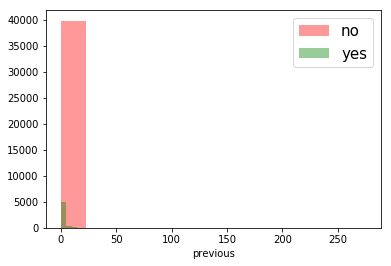

In [20]:
colors =["red","green"]
labels=["no","yes"]
for color,label in zip(colors,labels):
    z=sns.distplot(a=banking_df[banking_df["Target"]==label]["previous"],color=color,label=label,kde=False,bins=12)
    z.legend(fontsize = 15)

In [21]:
print(banking_df[banking_df["Target"] == "yes"]["previous"].value_counts().head(6))
# Below are the details of number of clients who subscribed the term deposit and the no. of times client was contacted before 
# this campaign

0    3384
1     583
2     456
3     294
4     171
5     121
Name: previous, dtype: int64


It Clearly shows that the maximum no.of clients that is 3384 who subscribe for term deposit has not been contacted before this campaign followed by 583 clients to whom contact was made only 1 time followed by 456 clients to whom contact was made 2 times and so on

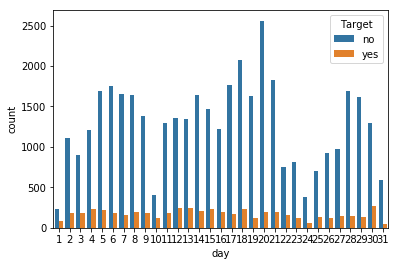

In [22]:
sns.countplot(x=banking_df["day"],hue=banking_df["Target"])

Here I am going to delete day column from data set because it does not make any sense about which day of the month should bank call to customer for marketing campaign. Also Machine learning will consider 31>30>29 in algorithms and if i use Separate column for each date then i will have 31 new columns for this and our model will face curse of dimentionality.So it is better to drop this column for further analysis.

In [23]:
banking_df.drop(labels="day",inplace=True,axis=1)

### Data PreProcessing

In [24]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()

In [25]:
banking_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,1,0,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,may,151,1,0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,1,0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,92,1,0,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,may,198,1,0,0,unknown,no


In [26]:
# Using Label Encoding for making variable into Categorical Variable
banking_df["month"] =  la.fit_transform(banking_df["month"])
banking_df["education"] =  la.fit_transform(banking_df["education"])
banking_df["contact"] =  la.fit_transform(banking_df["contact"])
banking_df["marital"] =  la.fit_transform(banking_df["marital"])
banking_df["poutcome"] =  la.fit_transform(banking_df["poutcome"])
banking_df["job"] =  la.fit_transform(banking_df["job"])
banking_df["loan"] = banking_df["loan"].replace({"yes" : 1 , "no" : 0})
banking_df["default"] = banking_df["default"].replace({"yes" : 1 , "no" : 0})
banking_df["housing"] = banking_df["housing"].replace({"yes" : 1 , "no" : 0})
banking_df["Target"] = banking_df["Target"].replace({"yes" : 1 , "no" : 0})

In [27]:
banking_df = pd.get_dummies(data=banking_df,columns=["education","contact","marital","poutcome","job"])

In [28]:
banking_df["Target"].corr(banking_df["month"])

-0.024471437667422668

There are 12 months given in the month column and if we use OneHotEncoder on this column then it will creare 12 new column and as we have seen in above cell the corelation value between Target and Month column is only -0.024 So in order to avoid overfitting of data I am going to drop this month column

In [29]:
banking_df.drop(labels=["month"],axis=1,inplace=True)

Duration Column have strong effect on overall prediction data. There is 16% increase in recall value of class 1 if we consider duration column for our Logistic Regression(Tested in Logistic Regression)in machine learning . Here we cant get the duration before the call is made. and after the call we can get our desired output about whether person wants to subscribe the term deposit or not.So there is no need for duration column for further machine learning analysis.

In [30]:
banking_df.drop(labels=["duration"] , axis=1,inplace=True)

In [31]:
banking_df.head(2)

,age,default,balance,housing,loan,campaign,pdays,previous,Target,education_0,...,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11
0,58,0,2143,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,44,0,29,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
banking_df.columns
# These are the varibales now we are left with

Index(['age', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays',
       'previous', 'Target', 'education_0', 'education_1', 'education_2',
       'education_3', 'contact_0', 'contact_1', 'contact_2', 'marital_0',
       'marital_1', 'marital_2', 'poutcome_0', 'poutcome_1', 'poutcome_2',
       'poutcome_3', 'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5',
       'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11'],
      dtype='object')

### Making dependent and Independent Variables Separately

In [33]:
feature_varible = banking_df.drop(labels=["Target"],axis=1)
feature_varible_z =  feature_varible.apply(zscore)
X =  feature_varible_z
y = banking_df["Target"]
print("Here X has {} No. of records and {} No. of columns".format(X.shape[0],X.shape[1]))
print("Y has {} No. of Records".format(y.shape[0]))

Here X has 45211 No. of records and 34 No. of columns
Y has 45211 No. of Records


Here X represents the all independent columns and y represents Target column

## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size =0.30,random_state = 101)

In [36]:
print("No. of Records in training data set is" , X_train.shape[0])
print("No. of Records in test data set is" , X_test.shape[0])

No. of Records in training data set is 31647
No. of Records in test data set is 13564


In [37]:
print("Total records in y_train with class 1 :  " , y_train[y_train==1].count())
# THis is 70% of the Total No. of records with class 1  in Target Column

Total records in y_train with class 1 :   3692


In [38]:
print("Total records in y_test with class 1 :  " , y_test[y_test==1].count())
# THis is 30% of the Total No. of records with class 1  in Target Column

Total records in y_test with class 1 :   1597


## Machine Learning

### 1. Logistic Regression

#### In Logistic Regression we can create a model to get the probability of a customer whether customer will subscribe to term deposit or not

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logistic_model = LogisticRegression(solver="liblinear")
logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
y_prediction = logistic_model.predict(X_test)
print(logistic_model.score(X_test,y_test))

0.8942052491890298


It is showing that 89.42% of the total test record maches with the actual data . In other words our model is 89.42% accurate

In [42]:
# Confusion Matrix
pd.DataFrame(data =metrics.confusion_matrix(y_test,y_prediction),columns=["Predicted_0","Predicted_1"],index=["Actual_0","Actual_1"])

,Predicted_0,Predicted_1
Actual_0,11830,137
Actual_1,1298,299


In the above Confustion Matrix rows are representing Actuals and Columns are representing predicted with 0 and 1 . Here Total No. of Customers who did not subscribe for term deposit and is correctly predicted by the model is 11830 but those customers who did not subscribe for term deposit and not correctly predicted by the model is 137. In the same way those customers who actally subscribed for term deposit and correctly predicted by the model is 299 and those who subscribed for term deposit but incorrectly predicted by the model is 1298.

In [43]:
print(metrics.classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11967
           1       0.69      0.19      0.29      1597

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.79      0.59      0.62     13564
weighted avg       0.88      0.89      0.87     13564



Calculating average score by Taking 10 different types of combination of training and test set fron the same data

In [44]:
scores = []
for i in np.arange(10):
    X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 0.30)
    logistic_model.fit(X_train,y_train)
    scores.append(logistic_model.score(X_test,y_test))
print("Accuracy scores of Logistic model on 10 iteration" ,scores)
print("Average Accuracy Score of Logistic model {0:.2f}%".format(np.average(scores)*100))

Accuracy scores of Logistic model on 10 iteration [0.8946475965791801, 0.8952373930993807, 0.894426422884105, 0.8958271896195813, 0.8937629017988794, 0.8963432615747567, 0.8927307578885284, 0.8926570333235034, 0.8886021822471247, 0.8936154526688292]
Average Accuracy Score of Logistic model 89.38%


### Naive Bayes

#### Naive Bayes Assumes that the features in this data are independent of each other It works on the conditional Probability that something will happen when something has already occured

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
naive_bayes_model = GaussianNB()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 101)
naive_bayes_model.fit(X_train,y_train)
y_prediction = naive_bayes_model.predict(X_test)
naive_bayes_model.score(X_test,y_test)

0.7985107637864937

This model shows accuracy only 79.85 % means our model is only 79.85 % accurate which is not a sign of good predictive model

In [47]:
# Confusion Matrix
pd.DataFrame(data =metrics.confusion_matrix(y_test,y_prediction),columns=["Predicted_0","Predicted_1"],index=["Actual_0","Actual_1"])

,Predicted_0,Predicted_1
Actual_0,10151,1816
Actual_1,917,680


In the above Confustion Matrix rows are representing Actuals and Columns are representing predicted with 0 and 1 . Here Total No. of Customers who did not subscribe for term deposit and is correctly predicted by the model is 10151 but those customers who did not subscribe for term deposit and not correctly predicted by the model is 1816. In the same way those customers who actally subscribed for term deposit and correctly predicted by the model is 680 and those who subscribed for term deposit but incorrectly predicted by the model is 917.

In [48]:
print(metrics.classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88     11967
           1       0.27      0.43      0.33      1597

   micro avg       0.80      0.80      0.80     13564
   macro avg       0.59      0.64      0.61     13564
weighted avg       0.84      0.80      0.82     13564



<b>Calculating average score by Taking 10 different types of combination of training and test set fron the same data</b>

In [49]:
scores = []
for i in np.arange(10):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)
    naive_bayes_model.fit(X_train,y_train)
    scores.append(naive_bayes_model.score(X_test,y_test))
print("Accuracy scores of Naive Bayes model on 10 iteration" ,scores)
print("Average Accuracy Score ofNaive Bayes Model {0:.2f}%".format(np.average(scores)*100))

Accuracy scores of Naive Bayes model on 10 iteration [0.8045561781185491, 0.7985844883515187, 0.7961515777056916, 0.79991153052197, 0.7978472427012681, 0.7975523444411678, 0.7987319374815689, 0.8017546446475966, 0.7965939250958419, 0.8006487761722206]
Average Accuracy Score ofNaive Bayes Model 79.92%


### K-Nearest Neighbors

K- Nearest Neighbors can be used for classification as well as regression. It is an instance based method for predicting class or value of given query. In this algorithm classification is computed from a simple majority vote of the nearest neighbors of each point. New data point is assigned to a class which has the most data points in the nearest neighbors.

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
nearest_neighbors_model = KNeighborsClassifier(n_neighbors=5,weights="distance")
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 101)
nearest_neighbors_model.fit(X_train,y_train)
y_prediction = nearest_neighbors_model.predict(X_test)
nearest_neighbors_model.score(X_test,y_test)

0.8737835446770864

Here our model is showing 87.38% accuracy in prediction

In [52]:
# Confusion Matrix
pd.DataFrame(data =metrics.confusion_matrix(y_test,y_prediction),columns=["Predicted_0","Predicted_1"],index=["Actual_0","Actual_1"])

,Predicted_0,Predicted_1
Actual_0,11490,477
Actual_1,1235,362


In the above Confustion Matrix rows are representing Actuals and Columns are representing predicted with 0 and 1 . Here Total No. of Customers who did not subscribe for term deposit and is correctly predicted by the model is 11490 but those customers who did not subscribe for term deposit and not correctly predicted by the model is 477. In the same way those customers who actally subscribed for term deposit and correctly predicted by the model is 362 and those who subscribed for term deposit but incorrectly predicted by the model is 1235.

In [53]:
print(metrics.classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     11967
           1       0.43      0.23      0.30      1597

   micro avg       0.87      0.87      0.87     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.87      0.86     13564



### Support Vector Machine

Support Vector Machine algorithm used for both classification as well as regression. It uses technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.

In [54]:
from sklearn.svm import SVC

In [55]:
svc_model =  SVC(kernel="rbf")
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 101)
svc_model.fit(X_train,y_train)
y_prediction =  svc_model.predict(X_test)
svc_model.score(X_test,y_test)

C:\Users\aman-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8924358596284282

This Model Shows 89.24 % Accuracy

In [56]:
# Confusion Matrix
pd.DataFrame(data =metrics.confusion_matrix(y_test,y_prediction),columns=["Predicted_0","Predicted_1"],index=["Actual_0","Actual_1"])

,Predicted_0,Predicted_1
Actual_0,11798,169
Actual_1,1290,307


In the above Confustion Matrix rows are representing Actuals and Columns are representing predicted with 0 and 1 . Here Total No. of Customers who did not subscribe for term deposit and is correctly predicted by the model is 11798 but those customers who did not subscribe for term deposit and not correctly predicted by the model is 169. In the same way those customers who actally subscribed for term deposit and correctly predicted by the model is 307 and those who subscribed for term deposit but incorrectly predicted by the model is 1290.

In [57]:
print(metrics.classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11967
           1       0.64      0.19      0.30      1597

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



## Decision Tree

<b>Tree based learning algorithms are considered to be one of the best and mostly used supervised learning methods. Tree based methods empower predictive models with high accuracy, stability and ease of interpretation. </b>

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
X_train , X_test , y_train,y_test  = train_test_split(X,y,test_size = 0.30 , random_state = 101)
decision_tree_model =  DecisionTreeClassifier(criterion="entropy",random_state=101)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [60]:
y_prediction =  decision_tree_model.predict(X_test)
print("Decision Tree Model test on Training set " ,decision_tree_model.score(X_train,y_train))
print("Decision Tree Model test on Test set ", decision_tree_model.score(X_test,y_test))

Decision Tree Model test on Training set  0.9995892185673207
Decision Tree Model test on Test set  0.82217634915954


Here Decision Tree model is showing 100% accuracy on training data but showing only 82% accuracy on test data. The reason is the overfitting of the data in the model. 

In [61]:
# Confusion Matrix
pd.DataFrame(data =metrics.confusion_matrix(y_test,y_prediction),columns=["Predicted_0","Predicted_1"],index=["Actual_0","Actual_1"])

,Predicted_0,Predicted_1
Actual_0,10676,1291
Actual_1,1121,476


In the above Confustion Matrix rows are representing Actuals and Columns are representing predicted with 0 and 1 . Here Total No. of Customers who did not subscribe for term deposit and is correctly predicted by the model is 10676 but those customers who did not subscribe for term deposit and not correctly predicted by the model is 1291. In the same way those customers who actally subscribed for term deposit and correctly predicted by the model is 476 and those who subscribed for term deposit but incorrectly predicted by the model is 1121.

In [62]:
print(metrics.classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     11967
           1       0.27      0.30      0.28      1597

   micro avg       0.82      0.82      0.82     13564
   macro avg       0.59      0.60      0.59     13564
weighted avg       0.83      0.82      0.83     13564



Here Recall Value is 89% in case of class 0 but only 30% in the case of class 1 which is not a good indicator of model. Now because our data have 45211 rows and 34 columns and if we go without regularization it will actually generate a big tree which will generate 100% accuracy on training set but very less accuracy on test set due to the overfitting of data. Lets draw the decision tree with some regularization

## Decision Tree (With Regularization)

In [63]:
X_train , X_test , y_train,y_test  = train_test_split(X,y,test_size = 0.30 , random_state = 101)
decision_tree_model =  DecisionTreeClassifier(criterion="entropy",random_state=101,max_depth=15)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [64]:
y_prediction =  decision_tree_model.predict(X_test)
print("Decision Tree Model test on Training set " ,decision_tree_model.score(X_train,y_train))
print("Decision Tree Model test on Test set ", decision_tree_model.score(X_test,y_test))

Decision Tree Model test on Training set  0.9198976206275477
Decision Tree Model test on Test set  0.876658802713064


Here our model is predicting 92% accuracy in Training set and 87% acuracy in test set. Accuracy in test set is better from previous model.lets check its confusion matrix and classification report

In [65]:
# Confusion Matrix
pd.DataFrame(data =metrics.confusion_matrix(y_test,y_prediction),columns=["Predicted_0","Predicted_1"],index=["Actual_0","Actual_1"])

,Predicted_0,Predicted_1
Actual_0,11597,370
Actual_1,1303,294


In the above Confustion Matrix rows are representing Actuals and Columns are representing predicted with 0 and 1 . Here Total No. of Customers who did not subscribe for term deposit and is correctly predicted by the model is 11597 but those customers who did not subscribe for term deposit and not correctly predicted by the model is 370. In the same way those customers who actally subscribed for term deposit and correctly predicted by the model is only 294 and those who subscribed for term deposit but incorrectly predicted by the model is 1303.

In [66]:
print(metrics.classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     11967
           1       0.44      0.18      0.26      1597

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.67      0.58      0.60     13564
weighted avg       0.85      0.88      0.85     13564



<b>Although overall score has improved from last decison tree model but Recall value for class 1 has dropped from 30% to 18%. So in this case we must add some more regularisation in this tree</b>

In [67]:
X_train , X_test , y_train,y_test  = train_test_split(X,y,test_size = 0.30 , random_state = 101)
decision_tree_model =  DecisionTreeClassifier(criterion="entropy",random_state=101,max_depth=15,max_features=10)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [68]:
y_prediction =  decision_tree_model.predict(X_test)
print("Decision Tree Model test on Training set " ,decision_tree_model.score(X_train,y_train))
print("Decision Tree Model test on Test set ", decision_tree_model.score(X_test,y_test))

Decision Tree Model test on Training set  0.9132935191329352
Decision Tree Model test on Test set  0.881082276614568


In [69]:
pd.DataFrame(data =metrics.confusion_matrix(y_test,y_prediction),columns=["Predicted_0","Predicted_1"],index=["Actual_0","Actual_1"])

,Predicted_0,Predicted_1
Actual_0,11639,328
Actual_1,1285,312


In the above Confustion Matrix rows are representing Actuals and Columns are representing predicted with 0 and 1 . Here Total No. of Customers who did not subscribe for term deposit and is correctly predicted by the model is 11639 but those customers who did not subscribe for term deposit and not correctly predicted by the model is 328. In the same way those customers who actally subscribed for term deposit and correctly predicted by the model is only 312 and those who subscribed for term deposit but incorrectly predicted by the model is 1285.

In [70]:
print(metrics.classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94     11967
           1       0.49      0.20      0.28      1597

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.69      0.58      0.61     13564
weighted avg       0.85      0.88      0.86     13564



Here Although Overall score for accuracy model on test data has increased from 87% to 88% but still recall value of class 1 is 20 which is very less as compare to our first decision tree model where recall value was 30% but that model was overfit with 100% accuracy on training dataset. For better result we cam use Ensemble method for Decision tree which is Random Forest

### Random Forest

Random forests, also known as random decision forests, are a popular ensemble method that can be used to build predictive models for both classification and regression problems.In the case of a random forest, the model creates an entire forest of random uncorrelated decision trees to arrive at the best possible answer.

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
X_train , X_test , y_train,y_test  = train_test_split(X,y,test_size = 0.30 , random_state = 101)
rfcl =  RandomForestClassifier(n_estimators=15,criterion="entropy")
rfcl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
y_prediction =  rfcl.predict(X_test)
print("Random Forest Model accuracy on Training set " ,rfcl.score(X_train,y_train))
print("Random Forest Model accuracy on Test set ", rfcl.score(X_test,y_test))

Random Forest Model accuracy on Training set  0.9926691313552627
Random Forest Model accuracy on Test set  0.8821881450899439


In [74]:
pd.DataFrame(data =metrics.confusion_matrix(y_test,y_prediction),columns=["Predicted_0","Predicted_1"],index=["Actual_0","Actual_1"])

,Predicted_0,Predicted_1
Actual_0,11588,379
Actual_1,1219,378


In [75]:
print(metrics.classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94     11967
           1       0.50      0.24      0.32      1597

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.70      0.60      0.63     13564
weighted avg       0.86      0.88      0.86     13564



Here overall score for training set has increased to 99% and for test set it is 88% which is better than any of the previous regularised decision tree model and also here recall percentage for class 1 is 24 which is better than the previous two regularised desicion tree model

### Ensemble Technique - Bagging

Bagging Method is designed to improve the stability and accuracy of classification and regression models. It improves variance errors and helps to avoid overfitting. It can be used with anytype of machine learning model. Here we are going to use it with naive bayes.

<b>Bagging with Naive Bayes</b>

In [76]:
from sklearn.ensemble import BaggingClassifier

In [77]:
bgcl = BaggingClassifier(base_estimator=naive_bayes_model, n_estimators=50, max_samples=.50 , oob_score=True)
bgcl.fit(X_train,y_train)

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=50, n_jobs=None, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [78]:
y_prediction =  bgcl.predict(X_test)
print("Bagging Classifier test on Training set " ,bgcl.score(X_train,y_train))
print("Bagging Classifier Model test on Test set ", bgcl.score(X_test,y_test))

Bagging Classifier test on Training set  0.7942616993711884
Bagging Classifier Model test on Test set  0.7960041285756414


In [79]:
pd.DataFrame(data =metrics.confusion_matrix(y_test,y_prediction),columns=["Predicted_0","Predicted_1"],index=["Actual_0","Actual_1"])

,Predicted_0,Predicted_1
Actual_0,10120,1847
Actual_1,920,677


In [80]:
print(metrics.classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88     11967
           1       0.27      0.42      0.33      1597

   micro avg       0.80      0.80      0.80     13564
   macro avg       0.59      0.63      0.60     13564
weighted avg       0.84      0.80      0.81     13564



There is very little effect of the Bagging Method used for Naive Bayes in overall accuracy and also in  recall value. The reason behind this can be the bias in the data towards maximum Number of 0 and less No. of 1 in target Column

### Ensemble Technique- ADABoosting

AdaBoost can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem.

In [81]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=logistic_model, n_estimators=50)
abcl = abcl.fit(X_train,y_train)

In [82]:
y_prediction =  abcl.predict(X_test)
print("ADA Boosting Classifier test on Training set " ,abcl.score(X_train,y_train))
print("ADA Boosting Classifier Model test on Test set ", abcl.score(X_test,y_test))

ADA Boosting Classifier test on Training set  0.892470060353272
ADA Boosting Classifier Model test on Test set  0.8939840754939545


In [83]:
pd.DataFrame(data =metrics.confusion_matrix(y_test,y_prediction),columns=["Predicted_0","Predicted_1"],index=["Actual_0","Actual_1"])

,Predicted_0,Predicted_1
Actual_0,11827,140
Actual_1,1298,299


In [84]:
print(metrics.classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11967
           1       0.68      0.19      0.29      1597

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.79      0.59      0.62     13564
weighted avg       0.88      0.89      0.87     13564



Again there is very little effect of the AdaBoosting Method used for Logistic Regression in overall accuracy and also in  recall value. The reason behind this can be the bias in the data towards maximum Number of 0 and less No. of 1 in target Column

### Ensemble Technique- Gradient Boosting

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)

In [109]:
y_prediction =  gbcl.predict(X_test)
print("Gradient Boosting Classifier test on Training set " ,gbcl.score(X_train,y_train))
print("Gradient Boosting Classifier Model test on Test set ", gbcl.score(X_test,y_test))

Gradient Boosting Classifier test on Training set  0.8957247132429614
Gradient Boosting Classifier Model test on Test set  0.8942789737540549


In [110]:
pd.DataFrame(data =metrics.confusion_matrix(y_test,y_prediction),columns=["Predicted_0","Predicted_1"],index=["Actual_0","Actual_1"])

,Predicted_0,Predicted_1
Actual_0,11826,141
Actual_1,1293,304


In [111]:
print(metrics.classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11967
           1       0.68      0.19      0.30      1597

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.79      0.59      0.62     13564
weighted avg       0.88      0.89      0.87     13564



In This case also there is very less improvement in overall score and in recall method when we compare with decision tree.

<b>Conclusion - > In base model naive bayes is providing good recall value of class 1 with 43% but if we consider overall accuracy then decision tree is better with 92% accuracy with some regulations. Apart from this in Ensamble method Random Forest is showing a good improvement in the model with increase in recall value for class 1 and also little increase in overall score than any regularised decision tree model. Rest Ensemble models are not showing a good improvement because of the data that we have contains only 11.70% class 1 value of the total data. So this bais in the data can be one of the reason.</b>